In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np


In [ ]:
import pandas as pd

# List of file names
files = [
    "Módulo de identificación.csv",
    "Módulo de capital social.csv",
    "Módulo de características del micronegocio.csv",
    "Módulo de costos, gastos y activos.csv",
    "Módulo de emprendimiento.csv",
    "Módulo de inclusión financiera.csv",
    "Módulo de personal ocupado.csv",
    "Módulo de sitio o ubicación.csv",
    "Módulo de TIC.csv",
    "Módulo de ventas o ingresos.csv",
    "Módulo personal ocupado (propietario(a)).csv"
]

# Dictionary to hold DataFrames
datasets = {}

# Read each file into a DataFrame and store it in the dictionary
for file in files:
    # Create a valid Python identifier for each file name
    dataset_name = file.replace(" ", "_").replace("(", "").replace(")", "").replace(",", "").replace(".csv", "").replace("ó", "o")
    datasets[dataset_name] = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Final_Project/Data/to_import/"+file)  # Include the subdirectory in the file path

# Now you can access each dataset by its name, for example:
print(datasets['Modulo_de_identificacion'].head(15))

    DIRECTORIO  SECUENCIA_P  SECUENCIA_ENCUESTA  COD_DEPTO  AREA  CLASE_TE  \
0      2120013            1                   1          8   NaN         2   
1      2120018            1                   1          8   NaN         2   
2      2120022            1                   1          8   NaN         2   
3      2120023            1                   1          8   NaN         2   
4      2120024            1                   1          8   NaN         1   
5      2120026            1                   2          8   NaN         1   
6      2120037            1                   1          8   NaN         1   
7      2120038            1                   2          8   NaN         1   
8      2120053            1                   2          8   NaN         1   
9      2120053            1                   3          8   NaN         1   
10     2120054            1                   1          8   NaN         1   
11     2120064            1                   1          8   NaN

In [ ]:
# Initialize the merged dataset with the first dataset
emicron = datasets[list(datasets.keys())[0]]

# Merge all other datasets
for dataset_name, dataset in list(datasets.items())[1:]:
    emicron = pd.merge(emicron, dataset, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "AREA", "F_EXP"], how='left')

# Now the 'emicron' DataFrame contains the merged data
print(emicron.head())

   DIRECTORIO  SECUENCIA_P  SECUENCIA_ENCUESTA  COD_DEPTO  AREA  CLASE_TE  \
0     2120013            1                   1          8   NaN         2   
1     2120018            1                   1          8   NaN         2   
2     2120022            1                   1          8   NaN         2   
3     2120023            1                   1          8   NaN         2   
4     2120024            1                   1          8   NaN         1   

   P35  P241 MES_REF  P3031  ...  VALOR_AGREGADO  INGRESO_MIXTO  P3088  P3089  \
0    2    34   ENERO      2  ...               0              0      2    NaN   
1    2    48   ENERO      2  ...          175000         175000      2    NaN   
2    2    26   ENERO      2  ...          155000         155000      2    NaN   
3    1    73   ENERO      2  ...         -635000        -635000      2    NaN   
4    2    71   ENERO      2  ...          890000         890000      2    NaN   

   P3090  P2989  P3091  SUELDOS  PRESTACIONES  REM

In [ ]:
f_ex_micro = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Final_Project/Data/to_import/factores_departamental_2022_proy_2018.csv")

In [ ]:
emicron = pd.merge(emicron, f_ex_micro, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P"], how='left')

In [ ]:
emicron.shape

(85862, 307)

In [ ]:
print(emicron.columns.tolist())

['DIRECTORIO', 'SECUENCIA_P', 'SECUENCIA_ENCUESTA', 'COD_DEPTO', 'AREA', 'CLASE_TE', 'P35', 'P241', 'MES_REF', 'P3031', 'P3032_1', 'P3032_2', 'P3032_3', 'P3033', 'P3034', 'P3035', 'P3000', 'GRUPOS4', 'GRUPOS12', 'F_EXP', 'P3002', 'P3003_1', 'P3003_2', 'P3003_3', 'P3003_4', 'P3003_5', 'P3003_6', 'P3003_7', 'P3003_8', 'P3004', 'P3005_1', 'P3005_2', 'P3005_3', 'P3005_4', 'P3005_5', 'P3005_6', 'P3005_7', 'P3005_8', 'P3006', 'P3007_1', 'P3007_2', 'P3007_3', 'P3007_4', 'P3007_5', 'P3007_6', 'P3007_7', 'P3007_8', 'P3008', 'P3009_1', 'P3009_2', 'P3009_3', 'P3009_4', 'P3009_5', 'P3009_6', 'P3009_7', 'P3009_8', 'P3010', 'P3011_1', 'P3011_2', 'P3011_3', 'P3011_4', 'P3011_5', 'P3011_6', 'P3011_7', 'P3011_8', 'P3012', 'P3013_1', 'P3013_2', 'P3013_3', 'P3013_4', 'P3013_5', 'P3013_6', 'P3013_7', 'P3013_8', 'P3022', 'P3015_1', 'P3015_2', 'P3015_3', 'P3015_4', 'P3015_5', 'P3015_6', 'P3015_7', 'P3015_8', 'P3016', 'P3021_1', 'P3021_2', 'P3021_3', 'P3021_4', 'P3021_5', 'P3021_6', 'P3021_7', 'P3021_8', 'P4

#check relevant columns how many missing values

In [ ]:
columns = [
    "P3032_3", "P3033", "GRUPOS4", "GRUPOS12", "P3051", "P639", "P3052", "P3053", "P3088", "P3089", "P3090", "P2989",
    "P3091", "SUELDOS", "PRESTACIONES", "REMUNERACION_TOTAL", "TIPO", "P3077", "P3079", "P3080", "P3081", "P3082",
    "P3083", "P3084", "P2990", "P1633", "P986", "P640", "P4000", "P1055", "P1056", "P661", "P1057", "P4004", "P2991",
    "P2992", "P2993", "P4001", "P2532", "P1559", "P2524", "P1093", "P3056_A", "P3056_B", "P3056_C", "P3056_D", "P3057_A",
    "P3057_B", "P3057_C", "P3057_D", "P3017_A", "P3017_B", "P3017_C", "P3017_D", "P3017_E", "P3017_F", "P3017_G", "P3017_H",
    "P3017_K", "P3017_I", "P3017_J", "P3017_L", "P3018_1", "P3018_2", "P3018_3", "P3018_4", "P3018_5", "P3018_6", "P3018_7",
    "P3018_A", "P3018_B", "P3018_C", "P3018_D", "P3018_E", "P3018_F", "P3019", "COSTOS_MES_ANTERIOR", "COSTOS_ANIO_ANTERIOR",
    "GASTOS_MES", "CONSUMO_INTERMEDIO", "P3057", "P3058", "P3059", "P3060", "P3061", "P3062", "P4002", "P3063", "P3064",
    "P3065", "P3066", "P3067", "P3092", "P3093", "P4005", "P4006", "P4007", "P4008", "P4009", "P4010", "P4011", "P4012",
    "P4013", "P4014", "P4015", "P4016", "P4017", "P4018", "P4019", "P4020", "P4021", "P4022", "P4023", "P4024", "P4025", "P4026",
    "P4027", "P4028", "P4029", "P4030", "P4031", "P4032", "P3072", "VENTAS_MES_ANTERIOR", "VENTAS_MES_ANIO_ANTERIOR",
    "VENTAS_ANIO_ANTERIOR", "VALOR_AGREGADO", "INGRESO_MIXTO", "P1764_1", "P1764_2", "P1764_3", "P1764_4", "P1764_5",
    "P1764_6", "P1764_7", "P1765", "P1765", "P1567", "P1569", "P1568", "P1571_1", "P1571_2", "P1571_3", "P1571_4", "P1571_5", "P1571_6",
    "P1570", "P1570_1", "P1570_2", "P1572_1", "P1572_2", "P1572_3", "P1572_4", "P1572_5", "P1572_6",
    "P3014", "P1573_1", "P1573_2", "P1573_3", "P1573_4", "P1573_5", "P1573_6", "P1574", "P1771", "P3002", "P3003_1", "P3003_2", "P3003_3",
    "P3003_4", "P3003_5", "P3003_6", "P3003_7", "P3003_8", "P3004", "P3005_1", "P3005_2", "P3005_3", "P3005_4",
    "P3005_5", "P3005_6", "P3005_7", "P3005_8", "P3006", "P3007_1", "P3007_2", "P3007_3", "P3007_4", "P3007_5",
    "P3007_6", "P3007_7", "P3007_8", "P3008", "P3009_1", "P3009_2", "P3009_3", "P3009_4", "P3009_5", "P3009_6",
    "P3009_7", "P3009_8", "P3010", "P3011_1", "P3011_2", "P3011_3", "P3011_4", "P3011_5", "P3011_6", "P3011_7",
    "P3011_8", "P3012", "P3013_1", "P3013_2", "P3013_3", "P3013_4", "P3013_5", "P3013_6", "P3013_7", "P3013_8",
    "P3022", "P3015_1", "P3015_2", "P3015_3", "P3015_4", "P3015_5", "P3015_6", "P3015_7", "P3015_8", "P3016",
    "P3021_1", "P3021_2", "P3021_3", "P3021_4", "P3021_5", "P3021_6", "P3021_7", "P3021_8", "P4003"
]

emicron_relevant = emicron[columns]
print(emicron_relevant.isnull().sum())

P3032_3     69740
P3033           0
GRUPOS4         0
GRUPOS12        0
P3051           0
            ...  
P3021_5     85661
P3021_6     85846
P3021_7     85761
P3021_8     85842
P4003       83256
Length: 237, dtype: int64


In [ ]:
print(emicron_relevant.columns[emicron_relevant.isnull().sum() == 0].tolist())


['P3033', 'GRUPOS4', 'GRUPOS12', 'P3051', 'P639', 'P3053', 'P3088', 'P3090', 'P2989', 'P3091', 'PRESTACIONES', 'REMUNERACION_TOTAL', 'P1633', 'P640', 'P1055', 'P4001', 'P2532', 'P1559', 'P2524', 'P3017_A', 'P3017_B', 'P3017_C', 'P3017_D', 'P3017_E', 'P3017_F', 'P3017_G', 'P3017_H', 'P3017_K', 'P3017_I', 'P3017_J', 'P3017_L', 'COSTOS_MES_ANTERIOR', 'GASTOS_MES', 'CONSUMO_INTERMEDIO', 'P3072', 'VENTAS_MES_ANTERIOR', 'VALOR_AGREGADO', 'INGRESO_MIXTO', 'P3002', 'P3004', 'P3006', 'P3008', 'P3010', 'P3012', 'P3022', 'P3016']


In [ ]:
emicron.columns[emicron.isnull().any()].tolist()


Most important columns with missing values (even though we could exclude them)

P661

P1057

P2991

P2992

P2993

P3014

SECUENCIA_PH

TIPO

P3080

P3082

P3084

P2990

#take only relevant columns and the ones with no NaN values


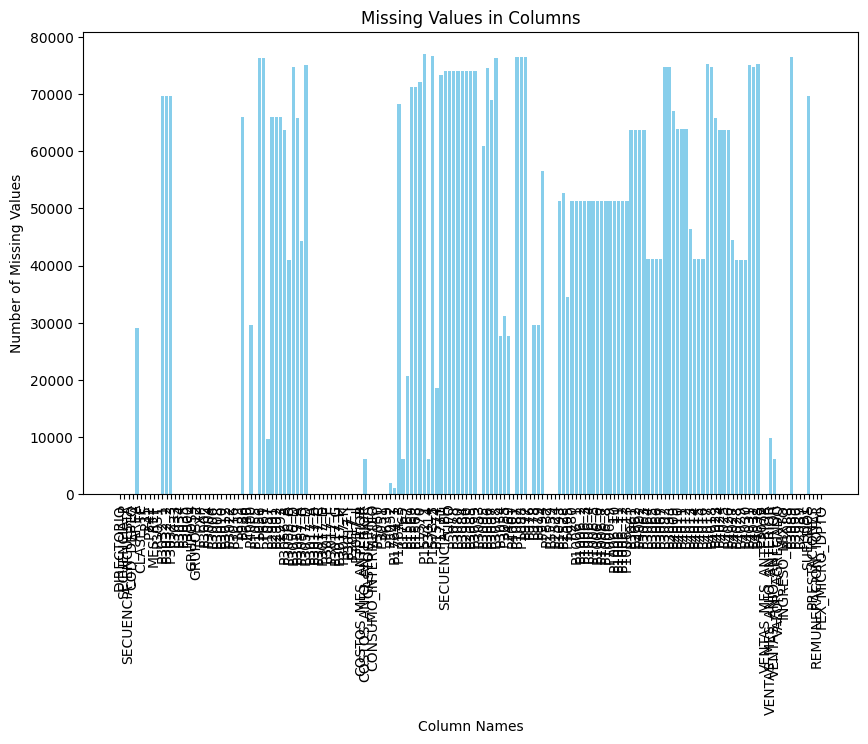

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'emicron' is a DataFrame
# Replace 'emicron' with your actual DataFrame name
missing_values = emicron.isna().sum()

plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values, color='skyblue')
plt.xlabel('Column Names')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Columns')
plt.xticks(rotation=90)
plt.show()


In [ ]:
emicron.describe()

In [ ]:
print((emicron.isna().sum()<20808).sum())
print((emicron.isna().sum()>20808).sum())

6
245


In [ ]:
(emicron.isnull().sum(axis=1).mean())/emicron.shape[1]

0.6675025153991136

In [ ]:
emicron.shape

(85862, 307)

In [ ]:
emicron['COD_DEPTO']

0         8
1         8
2         8
3         8
4         8
         ..
85857    66
85858    66
85859    66
85860    25
85861    25
Name: COD_DEPTO, Length: 85862, dtype: int64

In [49]:
columns_to_drop

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [54]:
# Calculate the percentage of NaN values in each column
nan_percentages = emicron.isnull().mean()

# Filter columns with more than 0% NaN values
columns_to_drop = nan_percentages[nan_percentages > 0].index


# Values to exclude from columns_to_drop
exclude_values = ['AREA', 'COD_DEPTO']

# Remove specified values from columns_to_drop
columns_to_drop_filtered = [col for col in columns_to_drop if col not in exclude_values]

# Drop the identified columns
emicron.drop(columns_to_drop_filtered, axis=1, inplace=True)

# Now 'emicron' contains the remaining columns
emicron.shape

['P3032_1', 'P3032_2', 'P3032_3', 'P3003_1', 'P3003_2', 'P3003_3', 'P3003_4', 'P3003_5', 'P3003_6', 'P3003_7', 'P3003_8', 'P3005_1', 'P3005_2', 'P3005_3', 'P3005_4', 'P3005_5', 'P3005_6', 'P3005_7', 'P3005_8', 'P3007_1', 'P3007_2', 'P3007_3', 'P3007_4', 'P3007_5', 'P3007_6', 'P3007_7', 'P3007_8', 'P3009_1', 'P3009_2', 'P3009_3', 'P3009_4', 'P3009_5', 'P3009_6', 'P3009_7', 'P3009_8', 'P3011_1', 'P3011_2', 'P3011_3', 'P3011_4', 'P3011_5', 'P3011_6', 'P3011_7', 'P3011_8', 'P3013_1', 'P3013_2', 'P3013_3', 'P3013_4', 'P3013_5', 'P3013_6', 'P3013_7', 'P3013_8', 'P3015_1', 'P3015_2', 'P3015_3', 'P3015_4', 'P3015_5', 'P3015_6', 'P3015_7', 'P3015_8', 'P3021_1', 'P3021_2', 'P3021_3', 'P3021_4', 'P3021_5', 'P3021_6', 'P3021_7', 'P3021_8', 'P4003', 'P986', 'P4000', 'P1056', 'P661', 'P1057', 'P4004', 'P2991', 'P2992', 'P2993', 'P3056_A', 'P3056_B', 'P3056_C', 'P3056_D', 'P3056_E', 'P3057_A', 'P3057_B', 'P3057_C', 'P3057_D', 'P3057_E', 'P3018_1', 'P3018_2', 'P3018_3', 'P3018_4', 'P3018_5', 'P3018_6'

(85862, 63)

In [ ]:
#167 if 90%. 187 if 95%

#take only relevant rows with no Nan values

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all columns

In [ ]:
nan_percentages = emicron.isnull().mean(axis=1)
columns_to_drop = nan_percentages[nan_percentages > 0].index
emicron.drop(columns_to_drop, inplace=True)

In [ ]:
emicron.isnull().mean(axis=1).mean()

0.0

In [ ]:
emicron.shape

(85862, 62)

In [ ]:
#save as csv
emicron.to_csv('emicron_clean.csv', index=False)